# Price analysis of Taxi trips in New York City

## Motivation
- Modern taxi companies like Uber and Lyft have made the Taxi trip prices as a blackbox. No one other than the company know how the price is determined. It is important for passengers to know how much more the companies charge the passengers and make them aware of the factors that determine the price.
- Understanding the factors affecting the price brings more transparency and forces companies and consumers to make the best judgement as to what would be a fair price so that all the involved stackholders (Drivers, Riders and Companies) can sustain according to their best interest.
- Even though Uber provides some sort of per minute and per mile rates in their fare breakdown, the rates are variable according to time and location. Predictable pricing allows consumers to plan and adopt the taxi services more.

## Problem Statement
- The goal of this analysis is to do Exploratory Data Analysis (EDA) and try to understand the patterns in each scenario and come to some well defined conclusions.
- These findings will help in coming up with the right Machine Learning model that tries to fit in the dataset.
- This ML Model can later be used to build a tool to show up the price estimate along with estimated share for each stackholder, given a pickup and dropoff location.

## Research Questions
1. Is the current form of pricing model adopted by Taxi companies benefit the consumers?
2. If a different model is to be adopted, what could be the possibilites which benefit all the stackholders like Drivers, Passengers and the Platform companies like Uber, Lyft?
3. Is there any way for the Taxi companies to remove the inefficiencies in the current business and pricing models and end up in profits? (For context: Uber and Lyft are still net loss making)

Import numpy, pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

Source of dataset [https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [3]:
# trip data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet

--2022-10-09 17:29:15--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:1a00:b:20a5:b140:21, 2600:9000:21dd:d000:b:20a5:b140:21, 2600:9000:21dd:be00:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:1a00:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458193119 (437M) [application/x-www-form-urlencoded]
Saving to: 'fhvhv_tripdata_2022-06.parquet.1'

fhvhv_tripdata_2022 100%[===================>] 436.97M  5.72MB/s    in 3m 30s  

2022-10-09 17:32:48 (2.08 MB/s) - 'fhvhv_tripdata_2022-06.parquet.1' saved [458193119/458193119]



In [4]:
# zone data
!wget https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

--2022-10-09 17:32:48--  https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:21dd:ea00:b:20a5:b140:21, 2600:9000:21dd:3200:b:20a5:b140:21, 2600:9000:21dd:d800:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:21dd:ea00:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [text/csv]
Saving to: 'taxi+_zone_lookup.csv.1'

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0.01s   

2022-10-09 17:32:49 (849 KB/s) - 'taxi+_zone_lookup.csv.1' saved [12322/12322]



Do
1. pip install pyarrow
2. pip install fastparquet

For reading parquet files

Read trip data for June 2022

In [5]:
df = pd.read_parquet('fhvhv_tripdata_2022-06.parquet')

In [6]:
df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2022-06-01 00:15:35,2022-06-01 00:17:20,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,...,0.68,2.75,0.0,1.00,9.36,N,N,,N,N
1,HV0003,B03404,B03404,2022-06-01 00:39:04,2022-06-01 00:40:36,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,...,1.81,2.75,0.0,4.82,15.61,N,N,,N,N
2,HV0003,B03404,B03404,2022-06-01 00:27:53,2022-06-01 00:31:34,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,...,1.09,2.75,0.0,1.00,8.22,N,N,,N,N
3,HV0003,B03404,B03404,2022-06-01 00:48:15,2022-06-01 00:49:38,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,...,2.19,2.75,0.0,0.00,16.88,N,N,,N,N
4,HV0005,B03406,None,2022-06-01 00:04:51,NaT,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,...,0.73,2.75,0.0,0.00,5.47,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,HV0003,B03404,B03404,2022-06-30 23:20:49,2022-06-30 23:24:23,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,...,1.56,2.75,0.0,2.24,16.23,N,N,,N,N
17780071,HV0003,B03404,B03404,2022-06-30 23:36:13,2022-06-30 23:39:12,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,...,1.59,2.75,0.0,0.00,13.94,N,N,,N,N
17780072,HV0003,B03404,B03404,2022-06-30 23:50:50,2022-06-30 23:55:11,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,...,1.06,2.75,0.0,3.00,18.46,N,N,,N,N
17780073,HV0003,B03404,B03404,2022-06-30 23:02:40,2022-06-30 23:04:58,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,...,2.79,2.75,0.0,1.00,27.27,N,N,,N,N


Read zone data

In [7]:
zone_df = pd.read_csv('taxi+_zone_lookup.csv')

In [8]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Statistics for each column of trip data

In [9]:
df.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07
mean,1.390083e+02,1.429608e+02,5.169061e+00,1.216133e+03,2.507782e+01,1.194475e+00,7.946835e-01,2.124014e+00,1.160395e+00,2.122203e-01,1.164189e+00,1.992252e+01
std,7.492537e+01,7.802175e+01,6.058429e+00,8.924502e+02,2.111751e+01,3.975068e+00,7.077042e-01,1.757838e+00,1.366686e+00,7.030242e-01,3.247914e+00,1.629283e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.055700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+02
25%,7.500000e+01,7.600000e+01,1.660000e+00,6.180000e+02,1.191000e+01,0.000000e+00,3.600000e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.570000e+00
50%,1.400000e+02,1.420000e+02,3.119000e+00,9.840000e+02,1.922000e+01,0.000000e+00,5.800000e-01,1.640000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.536000e+01
75%,2.110000e+02,2.200000e+02,6.420000e+00,1.544000e+03,3.084000e+01,0.000000e+00,9.700000e-01,2.670000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.477000e+01
max,2.650000e+02,2.650000e+02,6.259600e+02,4.230900e+04,2.409230e+03,2.262000e+02,7.291000e+01,2.156800e+02,1.100000e+01,6.900000e+00,1.500000e+02,9.933100e+02


Column description for this data - [https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf)

Data Cleaning/Processing - 1
- Remove unnecessary columns not relevant to our problem statement

In [10]:
df.drop(columns=['dispatching_base_num',
                 'originating_base_num',
                 'on_scene_datetime',
                 'tolls',
                 'bcf',
                 'sales_tax',
                 'congestion_surcharge',
                 'airport_fee',
                 'shared_request_flag',
                 'shared_match_flag',
                 'access_a_ride_flag',
                 'wav_request_flag',
                 'wav_match_flag'],
        inplace=True)

In [11]:
df

,hvfhs_license_num,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,HV0003,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,HV0003,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,HV0003,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,HV0003,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,HV0005,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,HV0003,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,HV0003,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,HV0003,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,HV0003,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


Data Cleaning/Processing - 2
- Drop NA values

In [12]:
df.dropna(inplace=True)

Data Cleaning/Processing - 3
- Rename Columns and map the taxi company code to taxi name like Uber, Lyft

Actual codes
- HV0002: Juno
- HV0003: Uber
- HV0004: Via
- HV0005: Lyft

In [13]:
df.rename(columns={
    'hvfhs_license_num': 'taxi_company',
    'PULocationID': 'PULocation',
    'DOLocationID': 'DOLocation'
}, inplace=True)

In [14]:
def license_company_map(lic):
    if lic == 'HV0003':
        return 'Uber'
    elif lic == 'HV0005':
        return 'Lyft'
    return lic

In [15]:
df['taxi_company'] = df['taxi_company'].map(license_company_map)

Data Cleaning/Processing - 4
- Now there are some unknown locations in Pickup and Dropoff which we know by analysing Zone dataframe
- Remove the rows containing unknown locations in "df"

In [16]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [17]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


In [18]:
def unknown_locations(id):
    if id == 264 or id == 265:
        return True
    return False

In [19]:
df[
    df.PULocation.map(unknown_locations)
].index

Int64Index([   13254,    64649,    70100,    75130,    86298,    99255,
              106944,   129350,   147399,   183654,
            ...
            17479230, 17500961, 17516820, 17545267, 17573284, 17618911,
            17700506, 17772055, 17773057, 17776276],
           dtype='int64', length=900)

In [20]:
df.drop(df[
    df.PULocation.map(unknown_locations)
].index, inplace=True)

In [21]:
df[
    df.DOLocation.map(unknown_locations)
].index

Int64Index([      23,       26,       44,       68,       80,      138,
                 150,      168,      192,      240,
            ...
            17779915, 17779930, 17779977, 17779986, 17779990, 17779999,
            17780016, 17780024, 17780036, 17780049],
           dtype='int64', length=767811)

In [22]:
df.drop(df[
    df.DOLocation.map(unknown_locations)
].index, inplace=True)

Data Cleaning/Processing - 5
- There are some trips either having 0 miles as trip_miles or 0 seconds as time_time
- Remove those trips

In [23]:
def zero_trip(trip_ms):
    if trip_ms == 0:
        return True
    return False

In [24]:
df.drop(df[
    df.trip_miles.map(zero_trip)
].index, inplace=True)

In [25]:
df.drop(df[
    df.trip_time.map(zero_trip)
].index, inplace=True)

In [26]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


In [27]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Data Cleaning/Processing - 6
- Expand the pickup and dropoff column to contain location names instead of location code
- This is used in later phases to lookup addresses and estimate distance

In [28]:
zone_df['LocationName'] = zone_df['Zone'] + ", " + zone_df['Borough']

In [29]:
zone_df

,LocationID,Borough,Zone,service_zone,LocationName
0,1,EWR,Newark Airport,EWR,"Newark Airport, EWR"
1,2,Queens,Jamaica Bay,Boro Zone,"Jamaica Bay, Queens"
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,"Allerton/Pelham Gardens, Bronx"
3,4,Manhattan,Alphabet City,Yellow Zone,"Alphabet City, Manhattan"
4,5,Staten Island,Arden Heights,Boro Zone,"Arden Heights, Staten Island"
...,...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone,"World Trade Center, Manhattan"
261,262,Manhattan,Yorkville East,Yellow Zone,"Yorkville East, Manhattan"
262,263,Manhattan,Yorkville West,Yellow Zone,"Yorkville West, Manhattan"
263,264,Unknown,NV,NaN,"NV, Unknown"


In [30]:
zone_df.set_index('LocationID', inplace=True)

In [31]:
id_location_map = zone_df['LocationName'].T.to_dict()

In [32]:
df['PULocation'] = df['PULocation'].map(id_location_map)

In [33]:
df['DOLocation'] = df['DOLocation'].map(id_location_map)

In [34]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,"Union Sq, Manhattan","Greenwich Village South, Manhattan",1.500,480,7.68,1.00,9.36
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,"Midtown Center, Manhattan","Manhattan Valley, Manhattan",4.180,835,20.40,4.82,15.61
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,"TriBeCa/Civic Center, Manhattan","Financial District North, Manhattan",2.910,549,12.29,1.00,8.22
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,"Financial District North, Manhattan","Stuyvesant Heights, Brooklyn",5.450,1197,24.70,0.00,16.88
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,"Kips Bay, Manhattan","Midtown East, Manhattan",1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,"East Harlem North, Manhattan","Stuy Town/Peter Cooper Village, Manhattan",6.070,816,17.60,2.24,16.23
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,"Stuy Town/Peter Cooper Village, Manhattan","Battery Park City, Manhattan",4.900,710,17.93,0.00,13.94
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,"TriBeCa/Civic Center, Manhattan","TriBeCa/Civic Center, Manhattan",0.530,595,11.98,3.00,18.46
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,"Union Sq, Manhattan","Clinton East, Manhattan",2.850,1184,31.47,1.00,27.27


In [35]:
def plot_bar(obj):
    obj.plot(kind='bar')

In [36]:
df['taxi_company'].value_counts()

Uber    12473021
Lyft     4534428
Name: taxi_company, dtype: int64

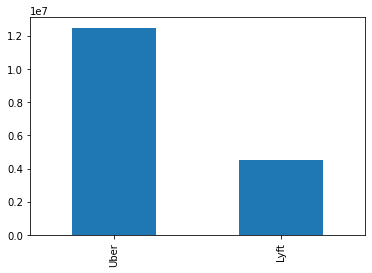

In [37]:
plot_bar(df['taxi_company'].value_counts())

Data Cleaning/Processing - 7
- Extract the hour from the given date time column for Request, Pickup and Dropoff
- This is used later to analyse the trips during different times of day

In [38]:
df['request_hour'] = df['request_datetime'].dt.hour
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

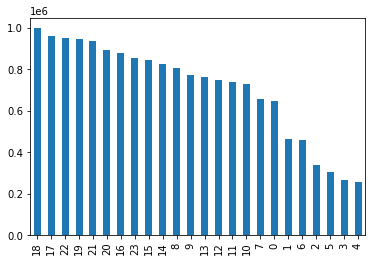

In [39]:
plot_bar(df['request_hour'].value_counts())

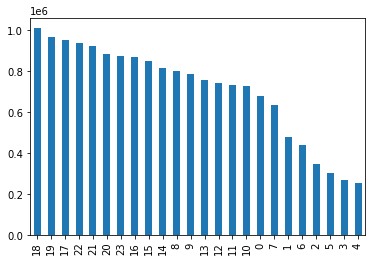

In [40]:
plot_bar(df['pickup_hour'].value_counts())

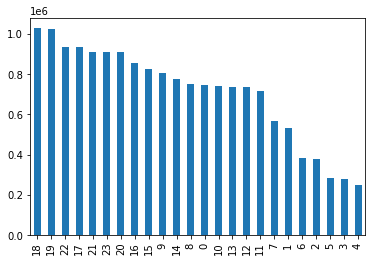

In [41]:
plot_bar(df['dropoff_hour'].value_counts())

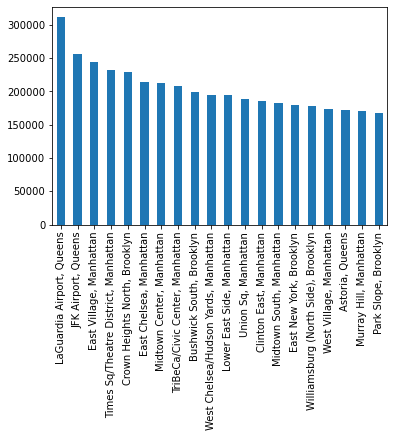

In [42]:
plot_bar(df['PULocation'].value_counts()[:20])

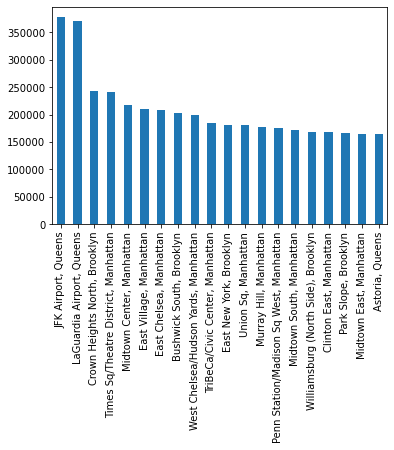

In [43]:
plot_bar(df['DOLocation'].value_counts()[:20])

In [44]:
def plot_hist(df, series, remove_extremes=True):
    max_value = df[series].quantile(0.99)
    if remove_extremes:
        df = df[df[series] < max_value]
        df = df[df[series] > 0]
    df[series].hist(bins=range(int(max_value)))

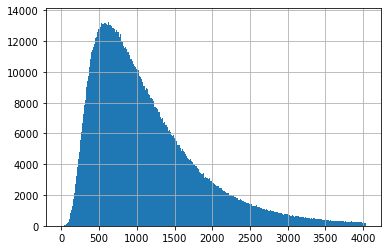

In [45]:
plot_hist(df, 'trip_time')

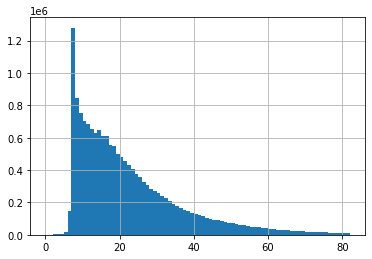

In [46]:
plot_hist(df, 'base_passenger_fare')

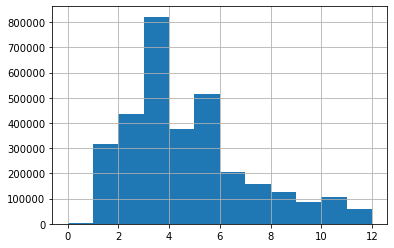

In [47]:
plot_hist(df, 'tips')

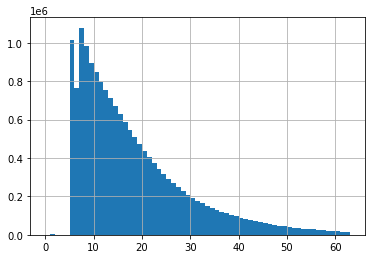

In [48]:
plot_hist(df, 'driver_pay')

Data Cleaning/Processing - 8
- Create a new column "driver_percent_in_fare" to analyse the driver's pay as a percentage of the "base_passenger_fare"
- This is used later to understand how much of a profit margin Taxi companies are targetting to achieve. This profit margin directly effects the price passengers pay.

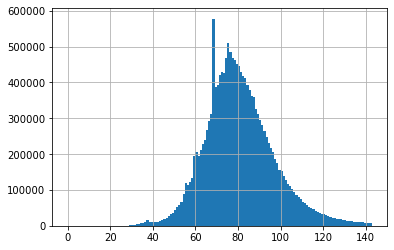

In [49]:
df['driver_percent_in_fare'] = df['driver_pay']/df['base_passenger_fare']*100
plot_hist(df, 'driver_percent_in_fare')

In [50]:
def plot_sns_grp_hist(grp_df, x, hue):
    ax = sns.histplot(grp_df, x=x, hue=hue, multiple='stack')
    ax.set(xlim=(0, grp_df[x].quantile(0.99)))

In [51]:
def plot_sns_grp_bar(grp_df, x, hue):
    ax = sns.barplot(grp_df, x=x, hue=hue, multiple='stack')
    ax.set(xlim=(0, grp_df[x].quantile(0.99)))

## Which users tip more? (Uber or Lyft)
Lyft

In [52]:
taxi_grp_df = df.groupby(['taxi_company'])

In [53]:
taxi_grp_df['tips'].mean()

taxi_company
Lyft    1.142484
Uber    1.032130
Name: tips, dtype: float64

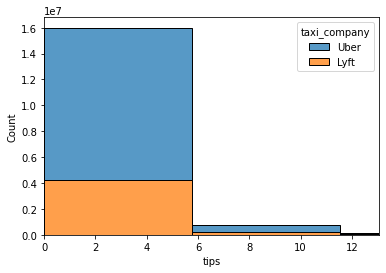

In [54]:
plot_sns_grp_hist(df, 'tips', 'taxi_company')

## Which drivers earn more? (Uber or Lyft)
Uber

In [55]:
taxi_grp_df['driver_pay'].mean()

taxi_company
Lyft    17.249506
Uber    19.016435
Name: driver_pay, dtype: float64

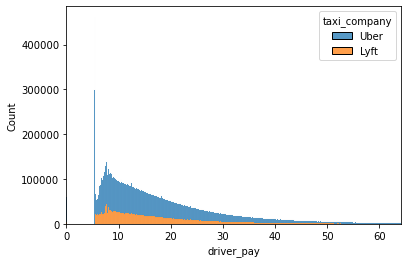

In [56]:
plot_sns_grp_hist(df, 'driver_pay', 'taxi_company')

## Which is cheaper for passenger?
Lyft

In [57]:
taxi_grp_df['base_passenger_fare'].mean()

taxi_company
Lyft    22.561838
Uber    23.572609
Name: base_passenger_fare, dtype: float64

## Preference for longer trips
Lyft

In [58]:
taxi_grp_df['trip_miles'].mean()

taxi_company
Lyft    4.677353
Uber    4.579548
Name: trip_miles, dtype: float64

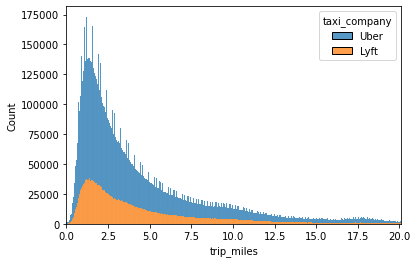

In [59]:
plot_sns_grp_hist(df, 'trip_miles', 'taxi_company')

## Passenger preference for "Uber vs Lyft" according to different times of day

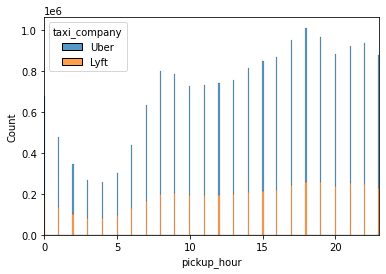

In [60]:
plot_sns_grp_hist(df, 'pickup_hour', 'taxi_company')

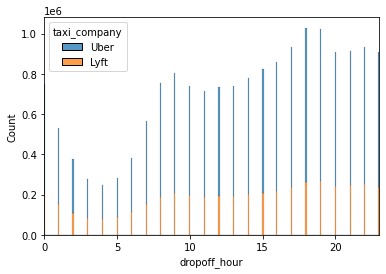

In [61]:
plot_sns_grp_hist(df, 'dropoff_hour', 'taxi_company')

Closely correlated and no specific preference

In [62]:
def remove_outliers(df, column):
    min_value = df[column].quantile(0.01)
    max_value = df[column].quantile(0.99)
    df = df[df[column] < max_value]
    df = df[df[column] > min_value]

In [63]:
def mean_std_norm(df, column):
    meanv = df[column].mean()
    stdv = df[column].std()
    df[column] = (df[column] - meanv)/stdv
    df[column] += 1
    df[column] /= 2

In [64]:
def min_max_norm(df, column):
    minv = df[column].min()
    maxv = df[column].max()
    df[column] = 100*(df[column] - minv)/(maxv - minv)

Data Cleaning/Processing - 9
- Each trip has different number of miles, time taken and the final price
- To compare the prices among different trips, a new column called "fare_per_mile_per_second" is created which is obtained by dividing the "base_passenger_fare" by the "trip_miles" and "trip_time"

In [65]:
df['fare_per_mile_per_second'] = df['base_passenger_fare']/(df['trip_miles']*df['trip_time'])

In [66]:
remove_outliers(df, 'fare_per_mile_per_second')
min_max_norm(df, 'fare_per_mile_per_second')

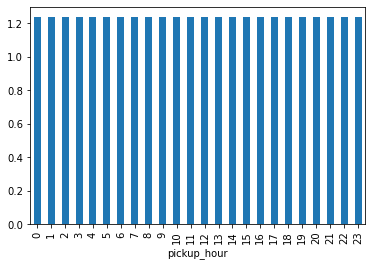

In [67]:
grp_by_pickup_hr = df.groupby(['pickup_hour'])
fms_by_hr = grp_by_pickup_hr['fare_per_mile_per_second'].mean()
plot_bar(fms_by_hr)

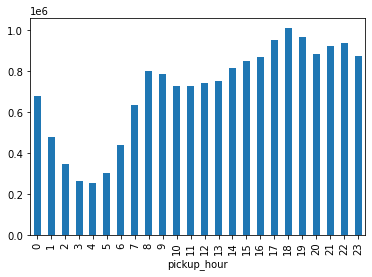

In [68]:
plot_bar(grp_by_pickup_hr.size())

In [69]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay,request_hour,pickup_hour,dropoff_hour,driver_percent_in_fare,fare_per_mile_per_second
0,Uber,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,"Union Sq, Manhattan","Greenwich Village South, Manhattan",1.500,480,7.68,1.00,9.36,0,0,0,121.875000,1.237362
1,Uber,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,"Midtown Center, Manhattan","Manhattan Valley, Manhattan",4.180,835,20.40,4.82,15.61,0,0,0,76.519608,1.237247
2,Uber,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,"TriBeCa/Civic Center, Manhattan","Financial District North, Manhattan",2.910,549,12.29,1.00,8.22,0,0,0,66.883645,1.237291
3,Uber,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,"Financial District North, Manhattan","Stuyvesant Heights, Brooklyn",5.450,1197,24.70,0.00,16.88,0,0,1,68.340081,1.237197
4,Lyft,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,"Kips Bay, Manhattan","Midtown East, Manhattan",1.069,234,8.23,0.00,5.47,0,0,0,66.464156,1.237896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,Uber,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,"East Harlem North, Manhattan","Stuy Town/Peter Cooper Village, Manhattan",6.070,816,17.60,2.24,16.23,23,23,23,92.215909,1.237192
17780071,Uber,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,"Stuy Town/Peter Cooper Village, Manhattan","Battery Park City, Manhattan",4.900,710,17.93,0.00,13.94,23,23,23,77.746793,1.237230
17780072,Uber,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,"TriBeCa/Civic Center, Manhattan","TriBeCa/Civic Center, Manhattan",0.530,595,11.98,3.00,18.46,23,23,0,154.090150,1.238018
17780073,Uber,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,"Union Sq, Manhattan","Clinton East, Manhattan",2.850,1184,31.47,1.00,27.27,23,23,23,86.653956,1.237330


In [70]:
grp_by_pickup_location = df.groupby(['PULocation'])
sorted_pickup_locations = grp_by_pickup_location['fare_per_mile_per_second'].mean().sort_values(ascending=False)

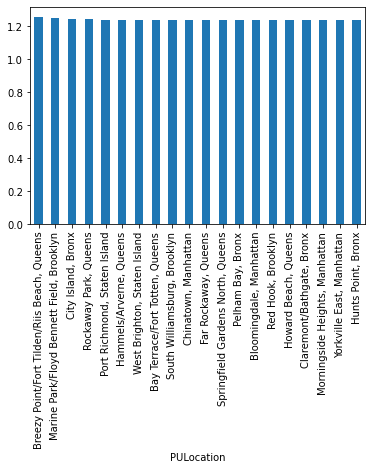

In [71]:
expensive_pickup_locations = sorted_pickup_locations[:20]
plot_bar(expensive_pickup_locations)

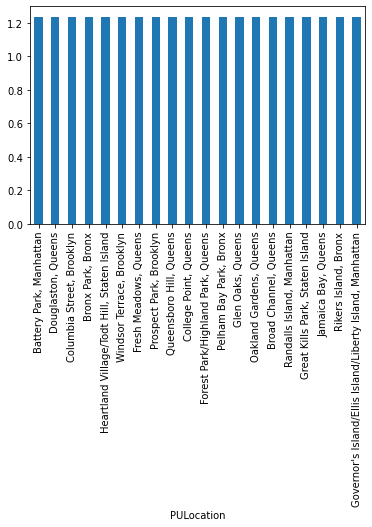

In [72]:
cheap_pickup_locations = sorted_pickup_locations[-20:]
plot_bar(cheap_pickup_locations)

In [73]:
grp_by_dropoff_location = df.groupby(['DOLocation'])
sorted_dropoff_locations = grp_by_dropoff_location['fare_per_mile_per_second'].mean().sort_values(ascending=False)

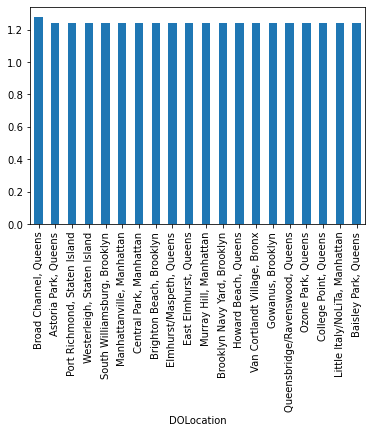

In [74]:
expensive_dropoff_locations = sorted_dropoff_locations[:20]
plot_bar(expensive_dropoff_locations)

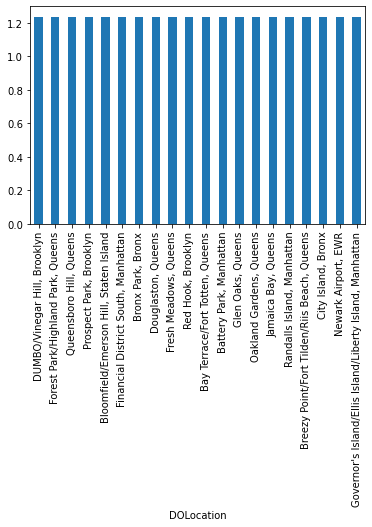

In [75]:
cheap_dropoff_locations = sorted_dropoff_locations[-20:]
plot_bar(cheap_dropoff_locations)

In [76]:
popular_pickup_locations = grp_by_pickup_location.size().sort_values(ascending=False).reset_index()

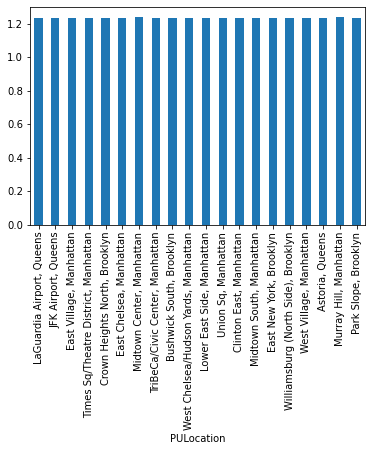

In [77]:
plot_bar(grp_by_pickup_location['fare_per_mile_per_second'].mean()[popular_pickup_locations['PULocation']][:20])

In [78]:
popular_dropoff_locations = grp_by_dropoff_location.size().sort_values(ascending=False).reset_index()

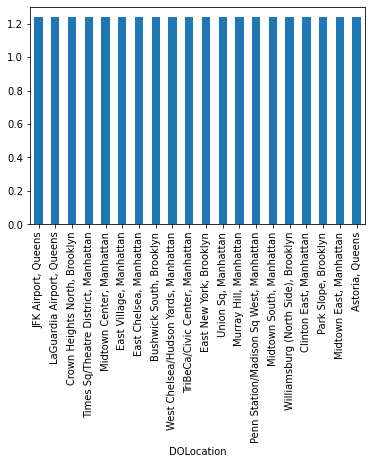

In [79]:
plot_bar(grp_by_dropoff_location['fare_per_mile_per_second'].mean()[popular_dropoff_locations['DOLocation']][:20])

Data Cleaning/Processing - 10
- In order to understand the true cost of each trip and the driver profits after deducting their gas cost, new columns like "driver_expenditure", "driver_profit" and "taxi_company_profit" are created.
- This is used in later phases to predict the base fare and how little or more the taxi company can charge the passenger and still end up in profit.

In [80]:
mpg = 20 # average miles per gallon
pg = 5.56 # gas price in June 2022
df['driver_expenditure'] = (df['trip_miles']/mpg)*pg
df['driver_profit'] = df['driver_pay'] - df['driver_expenditure']
df['taxi_company_profit'] = df['base_passenger_fare'] - df['driver_pay']

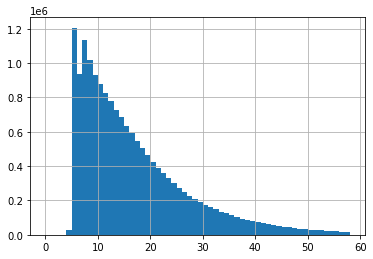

In [81]:
plot_hist(df, 'driver_profit')

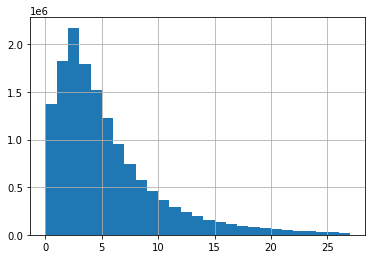

In [82]:
plot_hist(df, 'taxi_company_profit')